Student name: Masinde Victor Kiprono

Student pace: Hybrid

Instructor name: Maryann Mwikali

# Predicting Customer Churn For SyriaTel Company

## Business Understanding
This project deals with a company, SyriaTel, that wants to know more about their customer churn. Customers leave a company due to different reasons and my project aims to uncover the reasons and predict customer churn. The company can then use the information gained from this project to work on retaining their customers.

## Import The Necessary Libraries to Notebook
For this project, I am going to use data that has already been collected and stored in kaggle. The data is stored in csv format. I will import the necessary libararies that will enable me read my data from the csv file. I will also import other libraries that will be of help to me in editing my data and visualizing it. I will also import some libraries from **scikit learn** that will help me in **modelling**

In [1]:
# Import libraries necessary for your project
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
sns.set_style('darkgrid')
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz



I will use the Libraries above to read the contents of the csv file in folder named df to my notebookmin preparation for analysis.I will create a variable `df` where I will save my data. After saving the data inside my variable, I will go ahead and check the structure of our data by calling `df.head()` which shows us the preview of our data.I

In [2]:
#Read the data into the notebook using pandas
df=pd.read_csv('Customer churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data understanding
I will use different built in panda methods to check for the structure of my data. I will inspect the number of rows and columns. I will also check for the summary of my data. 

This dataset was sourced from kaggle and it has 3333 rows and 21 columns. The dataset has dsata recorded in different data type including float, intergers and objects. The columns are properly named showing what happens in the communication sector.

In [3]:
#Check for the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#Check for the statistical summary of the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#Check for the number of columns and rows
df.shape

(3333, 21)

In [6]:
#print the names of columns in our data
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## Data cleaning
We check our data to see if it ready for modelling. The data needs to be free from duplicates, missing values and wrongly recorded data. Unnecessary columns are also dropped at this point.

In [7]:
#Checking for duplicates
df.duplicated().sum()

0

In [8]:
#Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

state and area code both play the same role which is showing the geographical characteristics of the customer. We can drop state and remain with area code. This way we ensure that there wont be repetitive features in our model.

In [9]:
#Drop the state column
df=df.drop(columns=['state'],axis=1)

checking the column containing phone numbers, we notice that it is recorded with a '-'. Fter removing it, we want to make this columns to be our index since phone numbers are unique to each customer and can be our identifiers here.

In [10]:
# remove the '-' in phone number column
# Convert from objects to interger
df['phone number'] = df['phone number'].str.replace('-', '').astype(int) 
df.set_index('phone number', inplace=True)

#Confirm if the column has been set as index
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
phone number,,,,,,,,,,,,,,,,,,,
3824657,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3717191,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3581921,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3759999,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
3306626,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Explolatory data analysis
 We will use `univariate`, `bivariate`, and `multivariate` analysis to perform a thorough investigation of the data in this section.

Finding potential `correlations` between the features and variable distribution is the goal of this kind of data exploration, which will be crucial for feature engineering and modelling. Features that have a high correlation with the target oare often good for building basline models.

In [11]:
#Check for the correlation of variables 
df.corr().churn

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

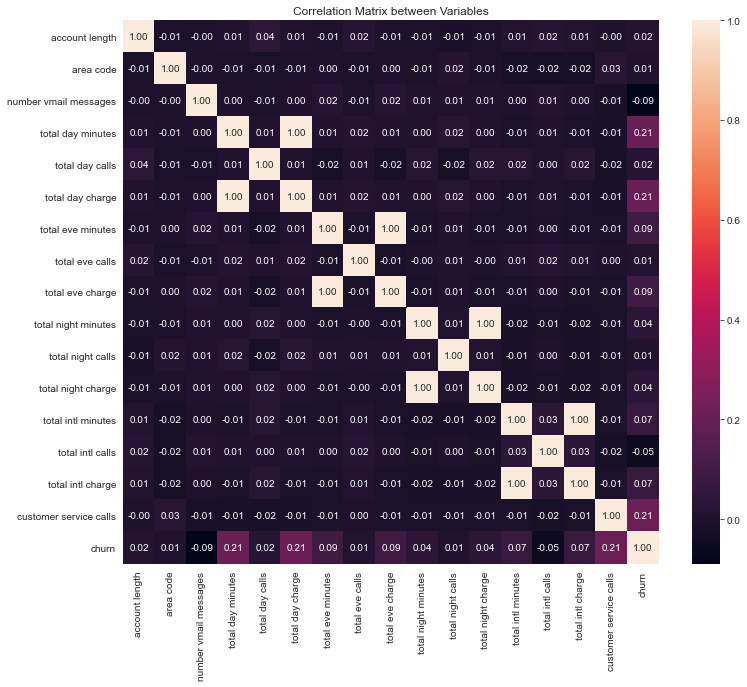

In [12]:
#correlation matrix 
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix between Variables')
plt.show();

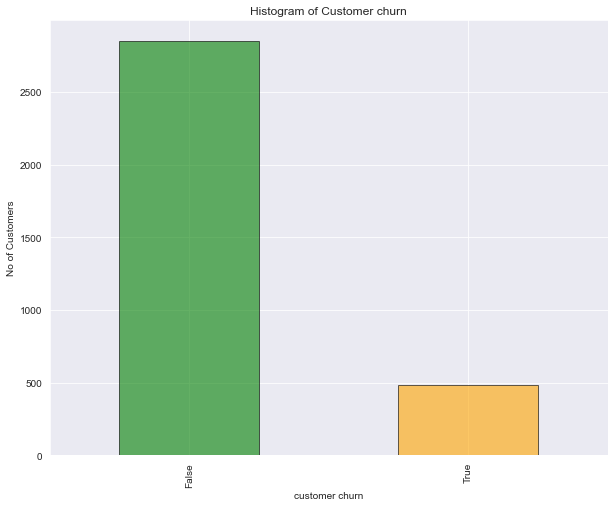

In [13]:
# Checking the number of customers who churned and who remained
colors = ['green', 'orange']
plt.figure(figsize=(10,8))
df['churn'].value_counts().plot(kind='bar', edgecolor='black',color=colors,alpha=0.6)
plt.xlabel('customer churn')
plt.ylabel('No of Customers')
plt.title('Histogram of Customer churn');

In [14]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

The graph above shows that there are more customers who remained in the company(2850) as compared to hose who terminated their contracts. Using this column in our model for logistic regression could introduce a class imbalance but that can be handled using methods like `SMOTE`

## Modelling


For classification model, my target variable will be in form of classes(False and True). For this to be used in a model, it must first be transformed to numerics. It will be a `Binary classification` since it has only two categorical variables. 0 will represent false while 1 will represent true



In [15]:
df['churn'] = df['churn'].astype(int)
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

Our model cannot work with categorical variables in training and testing

we need to get dummies for categorical columns and drop the first dummie, this will be used as the reference class.

In [16]:
#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area code', 'international plan', 'voice mail plan'],drop_first=True)
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_415,area code_510,international plan_yes,voice mail plan_yes
phone number,,,,,,,,,,,,,,,,,,,,
3824657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
3717191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
3581921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,0,0
3759999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
3306626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0,1,0


A model has features and the target. We need to separate them in preparation for mdoel feeding. `X` will be assigned to features while `y` will be assigned to the target variable 

In [17]:
y= df['churn']
X=df.drop(columns=('churn'))

Now that we have our data ready, we split it into two. This is to get data for `training` the model and another set for `testing` the model to see if it is effecient in generalising the model .For the training set we take 80% of our data since we want the model to use it to learn the underlying patterns. The test set can be 20% of our original data. Pass a random state in the formula for reproducibility when the code is run again.

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(2666, 19)
(667, 19)


## 1. LOGISTIC REGRESSION
**1.1 Baseline Model**

This is the logistic regression model without tuning any of the parameters

In [19]:
#Perfom scaling for the features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#create an object for logistic regression
logreg= LogisticRegression()

#fit the model with your features and target variables for training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

Once we have fitted the model, we can go ahead and use it together with `X_test` to make a `prediction(y_pred)`. We will then use this predicted value and compare it with our `real y(y_test)` and calculate the accuracy of our model. We are using the data from our test set to see how our model perfoms with unseen data. This will give us atrue picture of if our model has learnt the underlying patterns well or not.

In [20]:
#Make a prediction (y_pred) using the model
y_pred= logreg.predict(X_test_scaled)

###### Evaluating the model
Having the predicted y, we can now go ahead and evaluate our model. We want to see the  variation between our predicted value and our real value. We can calculate for **accuracy, confusion matrix** which shows us how well the model predicts the values in thneir correct classes`(True positive, False positive, True Negative and False Negative)`. We can also calculate the **classification report**

In [21]:
#Calculate for the accuracy of the model.
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.8575712143928036

The ratio of correctly predicted instances to total instances is 85.76% . Accuracy always shows us how well our model is in predicting both classes and the higher the value the better. It can be misleading at times tho and should not be used alone. 

In [22]:
#Work out the confusion matrix for the baseline model.
conf_matrix= confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[554  12]
 [ 83  18]]


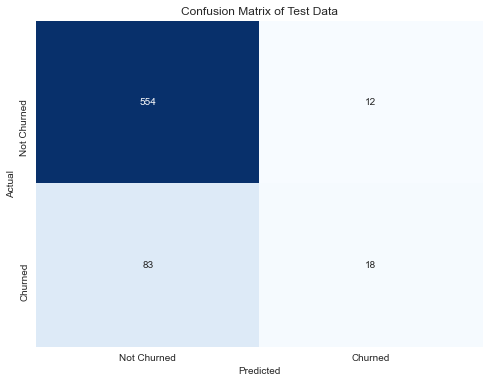

In [23]:
#We can visusalize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True, fmt="d", cmap='Blues', cbar=False,xticklabels=["Not Churned", "Churned"],
            yticklabels=["Not Churned", "Churned"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Test Data');

Our confusion matrix has picked 667 samples and out of this it has:

    554 correctly predicted not churned instances.
    83 incorrectly predicted not churned intstances.
    12 correctly predicted churned instances.
    18 incorrectly predicted churned instances.

In [24]:
#Calculate classification reports
class_report= classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



class 1 - churned class

class 0-  class not churned

The precision for class 0 is 87% while that of class 1 is 60%.
This means that out of instances predicted as class 1, 60% were from class 1.
Out of the instances predicted as class 0, 87% were actually from class 

The recall for class 0 is 98% while that of class 1 is 18%.
This means that Out of all actual instances of class 0, 98% were correctly identified by the model.
Out of all actual instances of class 1, 18% were correctly identified by the model.

The f1 score of class 0 is 92% while that of class 1 is 27%
The harmonic mean of precision and recall for class 0 is 92% which shows good perfomance for class 0.
The harmonic mean of precision and recall for class 1 is 27% which shows low perfomance for class 1

`ROC CURVE AND AUC`

Two crucial instruments for assessing the effectiveness of binary classification models are the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC).
ROC plots the True Positive Rate(TPR) against the False Positive Rate(FPR). The more this curve is towards the top left corner, the better the perfomance of the model.

The AUC provides a single value to help in gauging the model perfomance.A value of 1 shows that the model distinguishes well between negative and positive samples making a perfect classifier. A value of 0.5 shows that the model is equal to random guessing and will not be good for classification. That of above 0.5 means that the model is better than random guessing.


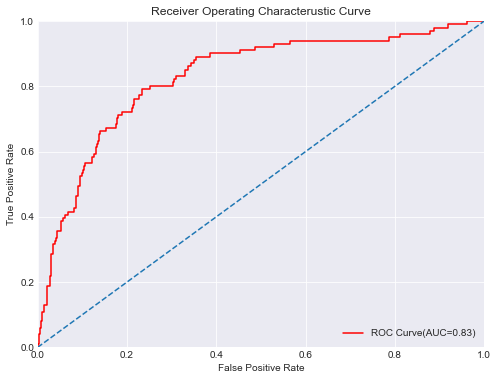

In [25]:
#Plotting the ROC curve and AUC

#predict probabilies of class churned
y_prob= logreg.predict_proba(X_test_scaled)[:,1]
#Calculate the ROC curve
fpr,tpr,thresholds = roc_curve(y_test, y_prob)
#We can also calculate the AUC
roc_auc = auc(fpr,tpr)

#Plot the graph
plt.figure(figsize=(8,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr,tpr,color='r',label=f"ROC Curve(AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterustic Curve')
plt.legend(loc='lower right')
plt.show()

**Interpretation**

In our case, the AUC is 0.72, which is greater than 0.5. This shows that the logistic regression model has reasonable discriminatory power in distinguishing between churned and not churned samples. An AUC of 0.72 suggests that the model has a good ability to rank the predictions, and it performs significantly better than random guessing.

High accuracy, precision, and recall for class 0 demonstrate how well the model predicts the negative class (not churned).
However, as evidenced by the low precision, recall, and F1-score values for class 1, it performs badly for the positive class (churned).
Put otherwise, a significant portion of consumers who are churned are not included in the model, resulting in false negatives. It is not accurately identifying the clients who have left.

This model is better than guessing but can have huge implications to the business as it fails to predict churned customers on a significant level

##### Tuning the logistic regression model
 *Using SMOTE technique
 
 SMOTE is a technique that adresses target class imbalance by generating sysnthetic samples for the minority class. It does this by replicating the samples in the minority class. After doing this, Both classes wwill have equal values therefore adressing class imbalance. We can now create another model using these values. y_test remain untouched so that it can  still represent the real world data when we are testing the perfomance of the model.

In [26]:
#Balance the target classes using SMOTE 
smote =SMOTE(k_neighbors=5, random_state=42,sampling_strategy='minority')

#Fit SMOTE to the model.
X_train_bal,y_train_bal = smote.fit_resample(X_train_scaled, y_train)
y_train_bal.value_counts()

0    2284
1    2284
Name: churn, dtype: int64

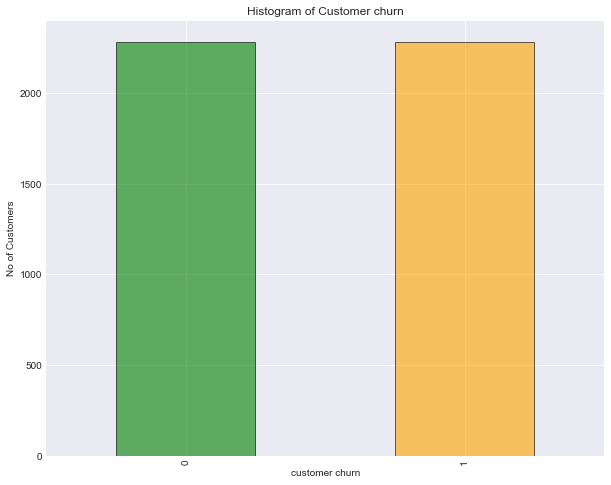

In [27]:
# Checking the number of customers who churned and who remained after perfoming SMOTE
colors = ['green', 'orange']

plt.figure(figsize=(10,8))
y_train_bal.value_counts().plot(kind='bar',color=colors, edgecolor='black',alpha=0.6)
plt.xlabel('customer churn')
plt.ylabel('No of Customers')
plt.title('Histogram of Customer churn');

**Tuned Model**

We want to create a model with tuned parameters then we will compare it with our baseline to see if there are improvements

In [28]:
#Create an object for this model
logreg1= LogisticRegression()

#Fit the model
logreg1=logreg1.fit(X_train_bal,y_train_bal)

#Make predictions to help in calculating accuracy
y_pred1 = logreg1.predict(X_test_scaled)


we proceed and evaluate the perfomance of the model. It gives us a way of comparing this with the first model.

In [29]:
#Calculate Accuracy of the tuned model
accuracy1= accuracy_score(y_test,y_pred1)
accuracy1

0.7841079460269865

In [30]:
#Calculate the confusion matrix of the tuned model
conf_matrix1= confusion_matrix(y_test,y_pred1)
conf_matrix1

array([[445, 121],
       [ 23,  78]], dtype=int64)

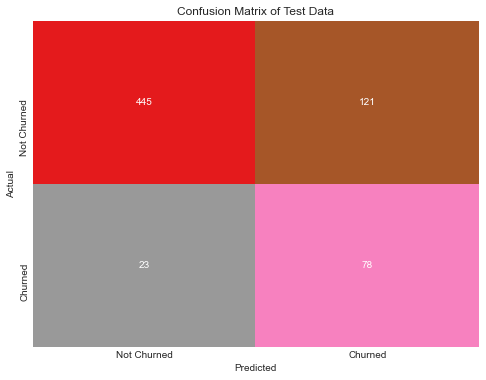

In [31]:
#We can visusalize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix1,annot=True, fmt="d", cmap='Set1_r', cbar=False,xticklabels=["Not Churned", "Churned"],
            yticklabels=["Not Churned", "Churned"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Test Data');

Our confusion matrix has picked 667 samples and out of this it has:

    445 correctly predicted not churned instances.
    121 incorrectly predicted not churned intstances.
    23 correctly predicted churned instances.
    78 incorrectly predicted churned instances.

In [32]:
#Calculate the classification report of the tuned model
class_report1= classification_report(y_test,y_pred1)
print(class_report1)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.77      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667



for the tuned model:

    The precision for class 0 is 95% while that of class 1 is 39%.
    This means that out of instances predicted as class 1, 39% were from class 1.
    Out of the instances predicted as class 0, 95% were actually from class 

    The recall for class 0 is 79% while that of class 1 is 77%.
    This means that Out of all actual instances of class 0, 79% were correctly identified by the model.
    Out of all actual instances of class 1, 77% were correctly identified by the model.

    The f1 score of class 0 is 86% while that of class 1 is 52%
    The harmonic mean of precision and recall for class 0 is 86% which shows good perfomance for class 0.
    The harmonic mean of precision and recall for class 1 is 52% which shows moderate perfomance for class 1
 As we can see by checking the F1 score, there is improvement in the perfomance of the model compared to the first one(`baseline model`)
    

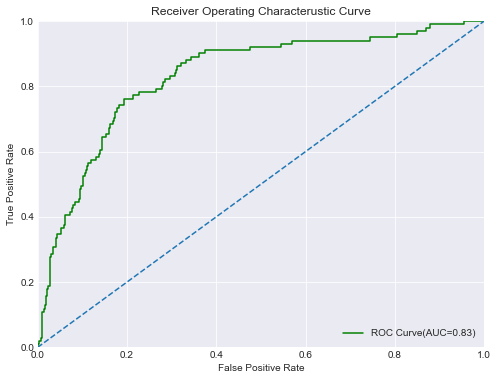

In [33]:
#Plotting the ROC curve and AUC

#predict probabilies of class churned
y_prob1= logreg1.predict_proba(X_test_scaled)[:,1]
#Calculate the ROC curve
fpr1,tpr1,thresholds1 = roc_curve(y_test, y_prob1)
#We can also calculate the AUC
roc_auc1 = auc(fpr1,tpr1)

#Plot the graph
plt.figure(figsize=(8,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr1,tpr1,color='g',label=f"ROC Curve(AUC={roc_auc1:.2f})")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterustic Curve')
plt.legend(loc='lower right')
plt.show()

**Interpretation**

Here, the AUC is 0.83, which is greater than 0.5. This shows that the tuned logistic regression model has good discriminatory power in distinguishing between churned and not churned samples. An AUC of 0.83 suggests that the model has a good ability to rank the predictions, and it performs way better than random guessing.

Checking at the calculated metrics; High accuracy, precision, and recall for class 0 demonstrate how well the model predicts the negative class (not churned)

On the other hand, we see a moderate precision, recall, and F1-score values for class 1, it performs moderately for the positive class (churned).

Every class is now equally included in the model, resulting in the reduction of the false negatives we saw earlier(from 83 t0 23). It can now be used in identifying the clients who have left.

This model is better than guessing  and also better than the first model.It can predict churned customers on a significant level.

# 2. DECISION TREE CLASSIFIER

just like logistic regression, we will train, test and evaluate the Decision Tree Classifier. We will start by calling the DecisionTreeClassifier and feed the model with both X_train and y_train data that we obtained earlier after adressing class imbalance.


In [34]:
#create an object for decision tree
dtc= DecisionTreeClassifier(random_state=42)

#fit the model
dtc_model=dtc.fit(X_train_bal,y_train_bal)

#Make a prediction using test data
y_pred2 = dtc_model.predict(X_test_scaled)

After fitting the model, we can use the predicted y together with y_test to calculate accuracy, precision, recall and f1_score 

In [35]:
#Calculate accuracy 
accuracy2=accuracy_score(y_test, y_pred2)
accuracy2

0.881559220389805

[[515  51]
 [ 28  73]]


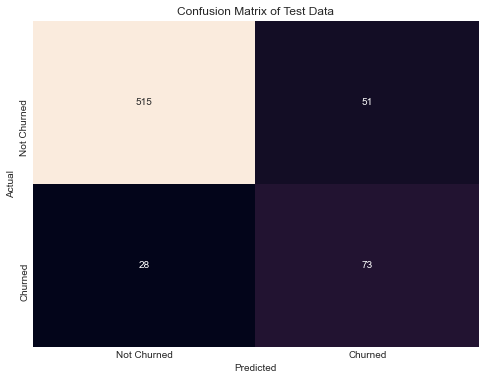

In [36]:
#Work out the confusion matrix for the  model.
conf_matrix2= confusion_matrix(y_test,y_pred2)
print(conf_matrix2)

#We can visusalize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix2,annot=True, fmt="d", cbar=False,xticklabels=["Not Churned", "Churned"],
            yticklabels=["Not Churned", "Churned"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Test Data');


Our confusion matrix has picked 667 samples and out of this it has:

    515 correctly predicted not churned instances.
    28 incorrectly predicted not churned intstances.
    51 correctly predicted churned instances.
    73 incorrectly predicted churned instances.

In [37]:
#Calculate class report metrics
class_report2= classification_report(y_test,y_pred2)
print(class_report2)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       566
           1       0.59      0.72      0.65       101

    accuracy                           0.88       667
   macro avg       0.77      0.82      0.79       667
weighted avg       0.89      0.88      0.89       667



The precision for class 0 is 95% while that of class 1 is 59%.
This means that out of instances predicted as class 1, 59% were from class 1.
Out of the instances predicted as class 0, 95% were actually from class 0.

The recall for class 0 is 91% while that of class 1 is 72%.
This means that Out of all actual instances of class 0, 91% were correctly identified by the model.
Out of all actual instances of class 1, 72% were correctly identified by the model.

The f1 score of class 0 is 93% while that of class 1 is 65%
The harmonic mean of precision and recall for class 0 is 93% which shows high perfomance for class 0.
The harmonic mean of precision and recall for class 1 is 65% which shows moderate perfomance for class 1.

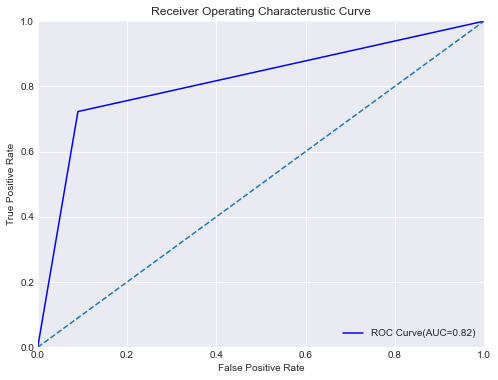

In [38]:
#plot the ROC curve and AUC

#predict probabilies of class churned
y_prob2= dtc_model.predict_proba(X_test_scaled)[:,1]
#Calculate the ROC curve
fpr2,tpr2,thresholds2 = roc_curve(y_test, y_prob2)
#We can also calculate the AUC
roc_auc2 = auc(fpr2,tpr2)

#Plot the graph
plt.figure(figsize=(8,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr2,tpr2,color='b',label=f"ROC Curve(AUC={roc_auc2:.2f})")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterustic Curve')
plt.legend(loc='lower right')
plt.show()


**Interpretation**

Here, the AUC is 0.82. This shows that the tuned logistic regression model has good discriminatory power in distinguishing between churned and not churned samples. An AUC of 0.82 suggests that the model has a good ability to rank the predictions, and it performs way better than random guessing and logistic regression models above.

Checking at the calculated metrics; High accuracy, precision, and recall for class 0 demonstrate how well the model predicts the negative class (not churned)

On the other hand, we see a moderate precision, recall, and F1-score values for class 1, it performs moderately for the positive class (churned).

The confusion matrix shows that we still have a high false positive(class predicted to be churned while it is not churned).This could be a problem making decisions

This model is better than guessing  and also better than the regression model.It can predict Not churned customers on a significant level but low perfomance when predicting churned customers .

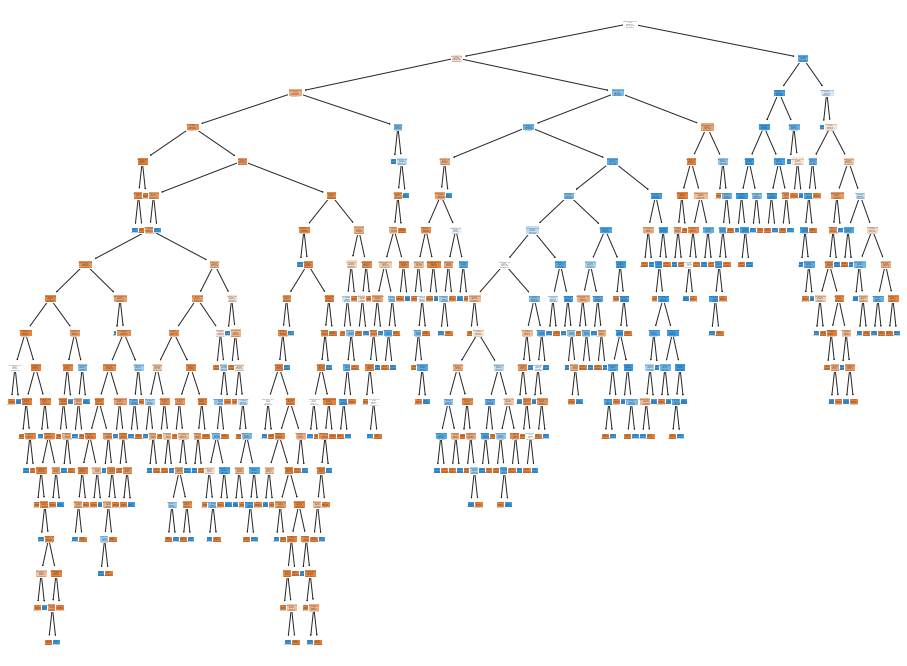

In [39]:
#plot a tree diagram
plt.figure(figsize=(16,12))
plot_tree(dtc_model, filled=True, feature_names=X.columns, class_names=['Notchurned', 'churned'])
plt.show()

Our decision tree above has so many branches that makes it hard for us to visuaize the components in it. This happens due to the likelihood that the model is overfitted, in that it learns too much patterns in the training data including the noise. Such a model is not good for us since it only perfoms well on training data but will perfom badly on unseen data.

## 3.RANDOM FOREST CLASSIFIER
This is the last model that we will be making use of in our project. We  will have a variety to choose from after comparing all the models and then settle on that with the highest perfomance.

A random Forest classifier is a type of learning method that works by creating multiple trees during training. It then outputs the class that is the mode of the classification classes of the individual trees created. It has an advantage over decision tree classifier since we can pass hyperparameters that help reduce overfitting



In [40]:
#Initialize the random forest classifier model
rfc = RandomForestClassifier(n_estimators=100,max_depth=3, min_samples_split=10, min_samples_leaf=5,random_state=42)

#Fit the model to the data
rfc_model= rfc.fit(X_train_bal,y_train_bal)

#Use the fitted model to make y prediction.
y_pred3 = rfc_model.predict(X_test_scaled)

**Evaluate the Model**

We can now evaluate the model to see how it is perfoming. The predicted y (y_pred3) is important here as we compare true value with the predicted value to check for variation.

In [41]:
#Calculate for accuracy
accuracy3= accuracy_score(y_test,y_pred3)
accuracy3

0.8800599700149925

[[506  60]
 [ 20  81]]


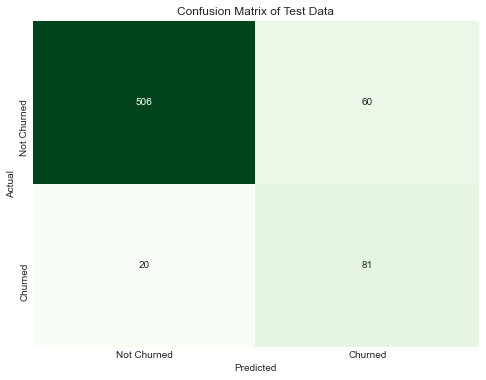

In [42]:
# Calculate for the condusion matrix for this model
conf_matrix3= confusion_matrix(y_test,y_pred3)
print(conf_matrix3)

#We can visusalize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix3,annot=True, fmt="d",cmap='Greens', cbar=False,xticklabels=["Not Churned", "Churned"],
            yticklabels=["Not Churned", "Churned"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Test Data');

Our confusion matrix has picked 667 samples and out of this it has:

    506 correctly predicted not churned instances.
    20 incorrectly predicted not churned intstances.
    60 correctly predicted churned instances.
    81 incorrectly predicted churned instances.

In [43]:
#Calculate class report metrics
class_report3= classification_report(y_test,y_pred3)
print(class_report3)

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       566
           1       0.57      0.80      0.67       101

    accuracy                           0.88       667
   macro avg       0.77      0.85      0.80       667
weighted avg       0.90      0.88      0.89       667



The precision for class 0 is 96% while that of class 1 is 57%.
Out of the instances predicted as class 0, 96% were actually from class 0.
This means that out of instances predicted as class 1, 57% were from class 1.

The recall for class 0 is 89% while that of class 1 is 80%.
This means that Out of all actual instances of class 0, 89% were correctly identified by the model.
Out of all actual instances of class 1, 80% were correctly identified by the model.

The f1 score of class 0 is 93% while that of class 1 is 67%
The harmonic mean of precision and recall for class 0 is 93% which shows high perfomance for class 0.
The harmonic mean of precision and recall for class 1 is 67% which shows good perfomance for class 1.

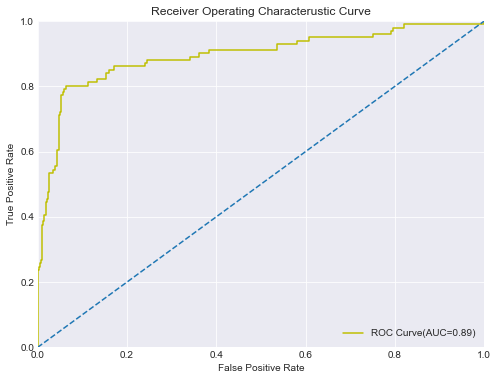

In [44]:
#plot the ROC curve and AUC

#predict probabilies of class churned
y_prob3= rfc_model.predict_proba(X_test_scaled)[:,1]
#Calculate the ROC curve
fpr3,tpr3,thresholds3 = roc_curve(y_test, y_prob3)
#We can also calculate the AUC
roc_auc3 = auc(fpr3,tpr3)

#Plot the graph
plt.figure(figsize=(8,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr3,tpr3,color='y',label=f"ROC Curve(AUC={roc_auc3:.2f})")
plt.plot([0,1],[0,1],linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterustic Curve')
plt.legend(loc='lower right')
plt.show()


**Interpretation**

Here, the AUC is 0.89. This shows that the tuned logistic regression model has very good discriminatory power in distinguishing between churned and not churned samples. An AUC of 0.89 suggests that the model has a very good ability to rank the predictions, and it performs way better than random guessing and logistic regression models above.

Checking at the calculated metrics; High accuracy, precision, and recall for class 0 demonstrate how well the model predicts the negative class (not churned)

we also see a high precision, recall, and F1-score values for class 1, it also performs well for the positive class (churned).

The confusion matrix shows that we have a low false positive(class predicted to be churned while it is not churned).This adresses the problem that the tree classification model had.

This model is better than all the above models.It can predict chuned and  Not churned customers on a significant level.

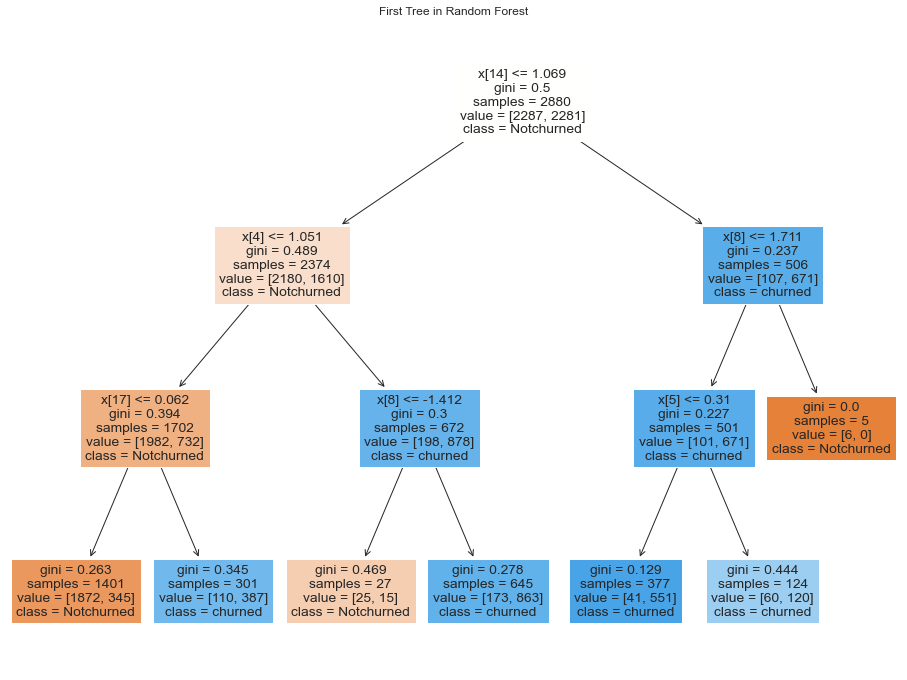

In [45]:
#Plot a decision tree
plt.figure(figsize=(16, 12))
plot_tree(rfc_model.estimators_[0],
          class_names=['Notchurned', 'churned'], filled=True)
plt.title("First Tree in Random Forest")
plt.savefig('first_tree.png')
plt.show()


The tree diagram above has managable branches and is interpretable. This is because of a feature of random forest model that made it possible to specofy the depth of the branches to 3 levels. This model is not overfitted and can be used to make predictions

## Comparing the Models
After fitiing and running all the models, we now want to compare them and see which one is the best according to their perfomance by metrics. We will then choose the highest perfoming model. We have several metrics that we will use to compare our models.

i) **comparing models using `ACCURACY`**

Accuracy is a basic metric for assessing the performance of classification models. It represents the proportion of correctly classified instances out of the total instances in the data set. 

In [46]:
# Comparing model accuracy
accuracy_results= {"Logististic Reg Baseline":accuracy,
                   "logistic Reg Tuned":accuracy1,
                   "Decison Tree classifier":accuracy2,
                   "Random Forest Classifier":accuracy3}

accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.set_index('Model')
accuracy_df= accuracy_df.sort_values(by='Accuracy', ascending=True)
accuracy_df

,Accuracy
Model,
logistic Reg Tuned,0.784108
Logististic Reg Baseline,0.857571
Random Forest Classifier,0.880060
Decison Tree classifier,0.881559


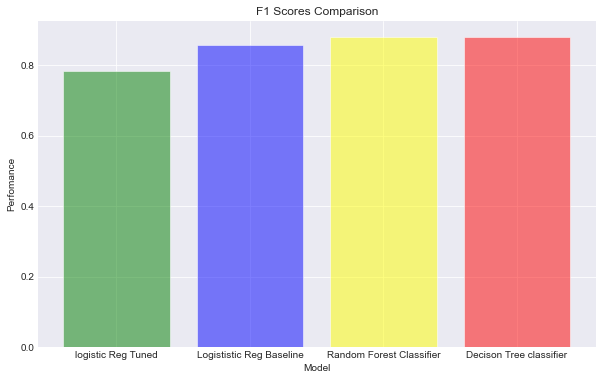

In [47]:
#Visualize Accuracy comparison 

x_axis=accuracy_df.index
y_axis=accuracy_df.values.flatten().tolist()

plt.figure(figsize=(10, 6))
colors=['green','Blue','Yellow','Red']
plt.bar(x_axis,y_axis,color=colors,alpha=0.5)
plt.title('F1 Scores Comparison')
plt.xlabel('Model')  
plt.ylabel('Perfomance');
plt.show()

From the visualizatios we see that in terms of accuracy, the model that is perfoming the best is `Decision Tree Classifier` then closely followed by Random Forest Classifier. The worst perfoming is the tuned logistic regression model.

ii) **comparing models using `F1 SCORE`**

F1 scores are an important evaluation metric in classification tasks, especially when dealing with imbalanced data sets. It provides a balance between accuracy and recall therefor providing a single measurement of the performance of a model. 

In [48]:
#Comparing model accuracy
f1_logbaseline = f1_score(y_test, y_pred)
f1_logtuned = f1_score(y_test, y_pred1)
f1_DecisionTree = f1_score(y_test, y_pred2)
f1_RandomForest = f1_score(y_test, y_pred3)

f1_scores={'f1_logbaseline':f1_logbaseline,'f1_logtuned':f1_logtuned,'f1_DecisionTree':f1_DecisionTree, 'f1_RandomForest':f1_RandomForest}
f1_scores= pd.DataFrame(f1_scores,index=['score'])
f1_scores=  f1_scores.T
f1_scores

,score
f1_logbaseline,0.274809
f1_logtuned,0.520000
f1_DecisionTree,0.648889
f1_RandomForest,0.669421


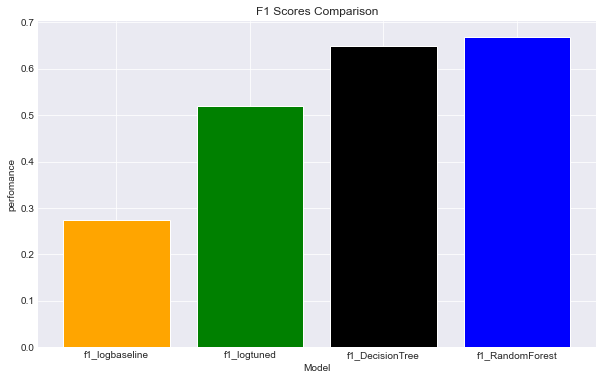

In [49]:
#Visualize F1 score comparison
x_axis=f1_scores.index
y_axis=f1_scores.values.flatten().tolist()

plt.figure(figsize=(10, 6))
colors=['orange','green','black','blue']
plt.bar(x_axis,y_axis,color=colors)
plt.title('F1 Scores Comparison')
plt.xlabel('Model')  # Changed from 'F1 Score' to 'Metric'
plt.ylabel('perfomance');
plt.show()

From the visualizations we see that in terms of accuracy, the model that is perfoming the best is `Random Forest Classifier` then closely followed by Decision Tree Classifier. The worst perfoming is the tuned logistic regression model.
The worst perfoming model is the logistic regression baseline model.

iii) **Comparing models using `ROC CURVES`**

ROC plots the True Positive Rate(TPR) against the False Positive Rate(FPR). The more this curve is towards the top left corner, the better the perfomance of the model.

The AUC provides a single value to help in gauging the model perfomance.A value of 1 shows that the model distinguishes well between negative and positive samples making a perfect classifier. A value of 0.5 shows that the model is equal to random guessing and will not be good for classification. That of above 0.5 means that the model is better than random guessing.

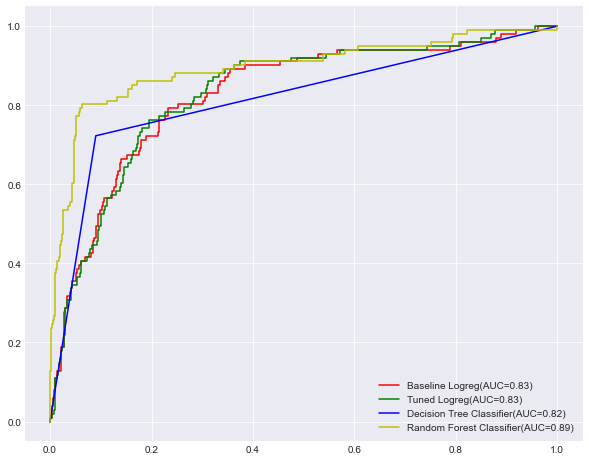

In [50]:
#Compare the ROC curves of all the models
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='r',label=f"Baseline Logreg(AUC={roc_auc:.2f})")
plt.plot(fpr1,tpr1,color='g',label=f"Tuned Logreg(AUC={roc_auc1:.2f})")
plt.plot(fpr2,tpr2,color='b',label=f"Decision Tree Classifier(AUC={roc_auc2:.2f})")
plt.plot(fpr3,tpr3,color='y',label=f"Random Forest Classifier(AUC={roc_auc3:.2f})")
plt.legend();

Evaluating the visualization above we see that the `AUC` of the `Random Forest Classifier is higher` than all the other models. This an indicator of a good model. We also check at the positions of our graph, in that the `curve that is closer to the top left corner is the one with the best perfomance`. The curve closer to the top left corner is that of the `Random Forest Classifier`.

## Conclusions & Recommendations
 
In conclusion, the analysis above shows that we can accurately predict customer churn on a significant level using a machine learning model.The comparisons indicate that the Random Forest Classifier Model is the most appropriate in our case being the one with good perfomance metrics overally. Random Forest Classifier is the best performing model with an ROC curve that is near the upper left corner of the graph, hence giving us the largest AUC (Area Under the curve).

**RECOMMENDATIONS**

I would recommend that Syriatel make use of the Random Forest Classifier as the primary model for predicting customer churn. This model has a higher ROC curve and strong overall performance in terms of accuracy, F1-score, recall, and precision on the test set, making it well-suited for accurately classifying customers as likely or unlikely to churn.

I would recommend that the company focuses on tuning the call minutes and charges to best fit the customers. These efforts could include personalized offers or discounts on day charges.Customers could be given more talk time with lower charges. By implementing cost-effective strategies that address the key factors driving customer churn, SyriaTel can retain customers and minimize revenue loss.

I would recommend, that Syriatel comes up with strategies to reduce on Customer Service calls. The more the customer service calls, the higher the likelihood of churn as this can easily irritate the customer. If the calls are necessary, then the company should come up with a way of educating thneir customers on the importance of the same.
